---
title: "motivation"
execute:
  freeze: auto  # re-render only when source changes
---

In [42]:
import requests

# URL of the JSON data
# url = 'https://climatereanalyzer.org/clim/sst_daily/json/oisst2.1_natlan1_sst_day.json'
url = 'https://climatereanalyzer.org/clim/sst_daily/json/oisst2.1_world2_sst_day.json'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract JSON data from the response
    json_data = response.json()

    # Specify the file path to save the data
    file_path = 'sst_daily_world.json'
    
    # Save the JSON data to a file
    with open(file_path, 'w') as f:
        json.dump(json_data, f)
    
    # Now you can work with the JSON data as a Python dictionary
    print(json_data)
else:
    # Print an error message if the request was not successful
    print(f"Failed to retrieve data. Status code: {response.status_code}")


[{'name': '1981', 'data': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [45]:
with open(file_path, 'r') as file:
    data = pd.read_json(file, lines=True)

# extracting the dictionaries into a list
data_dicts = data.iloc[0].tolist()

# creating an empty dataframe
df_transformed = pd.DataFrame()

# iterating over each dictionary to create a column for each year/category
for item in data_dicts:
    year = item['name']
    values = item['data']
    df_transformed[year] = values

# displaying the first few rows of the transformed dataframe
df_transformed

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2018,2019,2020,2021,2022,2023,2024,1982-2011 mean,plus 2σ,minus 2σ
0,NaN,20.08,20.09,19.96,19.86,19.89,19.98,20.12,19.86,19.98,...,20.42,20.52,20.62,20.47,20.54,20.55,20.94,20.10,20.43,19.77
1,NaN,20.11,20.12,19.98,19.88,19.89,19.99,20.13,19.86,19.99,...,20.43,20.51,20.62,20.46,20.54,20.55,20.96,20.10,20.43,19.78
2,NaN,20.12,20.14,19.99,19.92,19.88,20.00,20.16,19.87,19.99,...,20.44,20.49,20.63,20.46,20.57,20.55,20.98,20.13,20.44,19.81
3,NaN,20.12,20.15,20.03,19.99,19.87,20.01,20.17,19.89,20.00,...,20.45,20.49,20.64,20.45,20.58,20.54,21.00,20.13,20.44,19.82
4,NaN,20.11,20.14,20.06,20.06,19.88,20.00,20.19,19.90,20.00,...,20.46,20.49,20.64,20.45,20.59,20.53,21.02,20.14,20.44,19.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,20.03,20.06,19.93,19.86,19.87,19.96,20.10,19.91,19.96,20.04,...,20.52,20.54,20.46,20.55,20.53,20.90,NaN,20.10,20.42,19.78
362,20.02,20.06,19.95,19.87,19.87,19.96,20.10,19.90,19.96,20.06,...,20.51,20.54,20.47,20.55,20.53,20.92,NaN,20.10,20.42,19.78
363,20.03,20.05,19.94,19.87,19.88,19.97,20.11,19.88,19.97,20.08,...,20.52,20.55,20.47,20.54,20.54,20.92,NaN,20.09,20.41,19.76
364,20.04,20.07,19.94,19.86,19.90,19.97,20.11,19.86,19.97,20.07,...,20.52,20.59,20.47,20.54,20.55,20.92,NaN,20.09,20.42,19.76


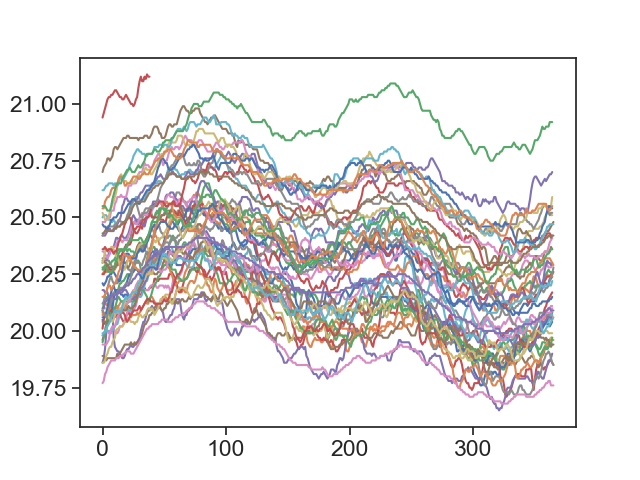

In [46]:
fig, ax = plt.subplots()

# plotting each column as a line plot on the same chart
for column in df_transformed.columns:
    ax.plot(df_transformed.index, df_transformed[column], label=column)


In [41]:
# initializing an empty list to hold dataframes before concatenating them
dfs = []

# iterating over each column in the original dataframe
for column in df_transformed.columns:
    try:
        # converting the column name to an integer to handle it as a year
        year = int(column)
        # determining the number of days in the year
        days_in_year = 366 if is_leap_year(year) else 365
        # creating a date range for the year
        dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', periods=days_in_year)
        # creating a temporary dataframe for the year's data
        temp_df = pd.DataFrame({'sst': df_transformed[column][:days_in_year].values}, index=dates)
        # adding the temporary dataframe to the list
        dfs.append(temp_df)
    except ValueError:
        # skipping columns that do not represent a year (e.g., "1982-2011 mean", "plus 2σ", "minus 2σ")
        continue

# concatenating all the temporary dataframes into one
df_sst_concat = pd.concat(dfs)

# resetting the index to have a datetime index
df_sst_concat.index = pd.to_datetime(df_sst_concat.index)

# showing the first few rows of the new dataframe
df_sst_concat.dropna(inplace=True)
df_sst_concat
df_sst_concat.to_csv('sst_daily_world.csv', index=True)


In [32]:
df_sst_concat['trend'] = df_sst_concat['sst'].rolling('365D', center=True).mean()

In [34]:
def concise(ax):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

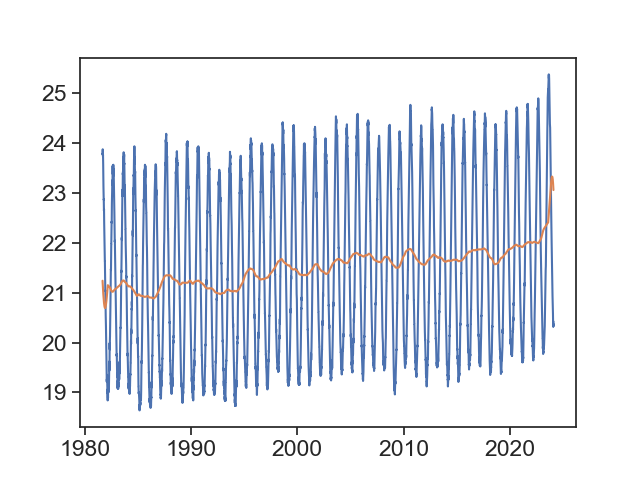

In [37]:
fig, ax = plt.subplots()
ax.plot(df_sst_concat['sst'])
ax.plot(df_sst_concat['trend'])
concise(ax)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
import matplotlib.dates as mdates

%matplotlib widget

In [2]:
filename = "../archive/data/kinneret_cleaned.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date')
df

,level
date,
2023-09-12,-211.115
2023-09-11,-211.105
2023-09-10,-211.095
2023-09-09,-211.085
2023-09-08,-211.070
...,...
1966-11-01,-210.390
1966-10-15,-210.320
1966-10-01,-210.270


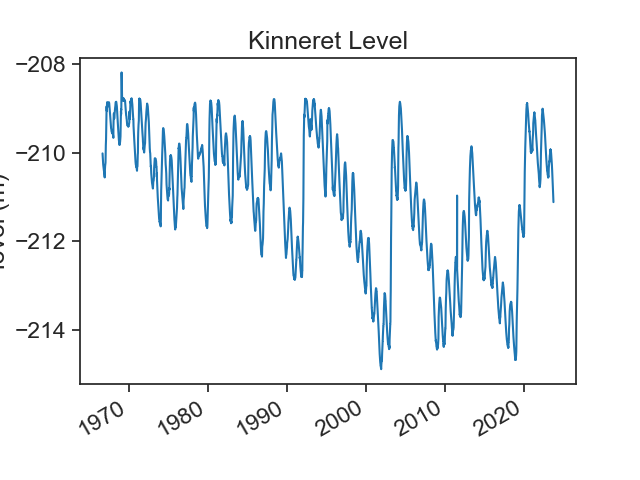

In [3]:
fig, ax = plt.subplots()
ax.plot(df['level'], color="tab:blue")
ax.set(title="Kinneret Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates

In [4]:
df['-seasonal'] = df['level'].rolling('365.24D', center=True).mean()

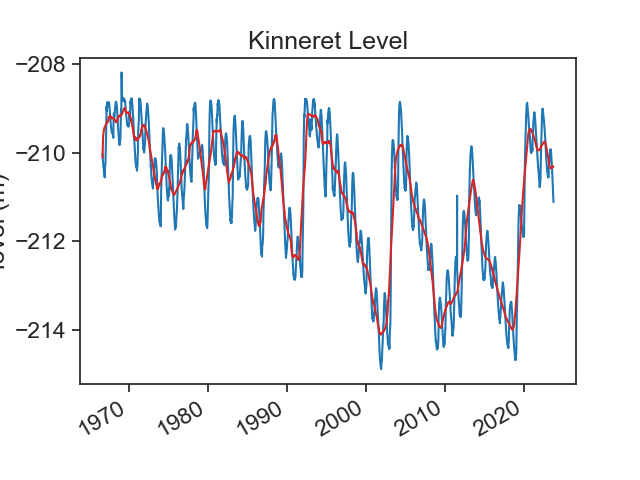

In [5]:
fig, ax = plt.subplots()
ax.plot(df['level'], color="tab:blue")
ax.plot(df['-seasonal'], color="tab:red")
ax.set(title="Kinneret Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates

The data seems ok, until we take a closer look. Data points are not evenly spaced in time.

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_57707/934261896.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax.plot(df.loc["1993":"1995", 'level'], color="tab:blue", marker="o")


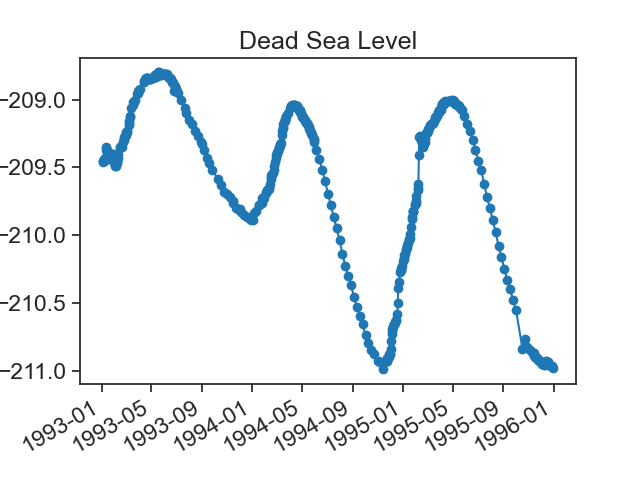

In [6]:
fig, ax = plt.subplots()
ax.plot(df.loc["1993":"1995", 'level'], color="tab:blue", marker="o")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates

We can resample by day (a much higher rate than the original), and linearly interpolate:

In [7]:
df2 = df['level'].resample('D').interpolate('time').to_frame()
df2['level_sm'] = df2['level'].rolling('30D', center=True).mean()
df3 = df2['level'].resample('W').mean().to_frame()

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_57707/2583247388.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax.plot(df.loc["1993":"1995", 'level'],


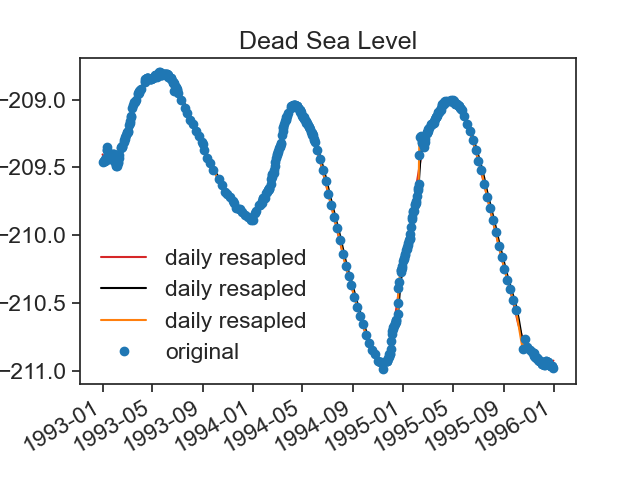

In [8]:
fig, ax = plt.subplots()
ax.plot(df2.loc["1993":"1995", 'level_sm'],
        color="tab:red",
        label="daily resapled")
ax.plot(df3.loc["1993":"1995", 'level'],
        color="black",
        label="daily resapled")
ax.plot(df2.loc["1993":"1995", 'level'],
        color="tab:orange",
        label="daily resapled")
ax.plot(df.loc["1993":"1995", 'level'],
        color="tab:blue",
        marker="o",
        linestyle="None",
        label="original")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")
plt.gcf().autofmt_xdate()  # makes slanted dates
ax.legend(frameon=False)

In [9]:
df2['naive'] = df2['level'].diff()
df2['gradient'] = np.gradient(df2['level'])

df3['naive'] = df3['level'].diff()
df3['gradient'] = np.gradient(df3['level'])

[Text(0.5, 1.0, 'Dead Sea Level'), Text(0, 0.5, 'level (m)')]

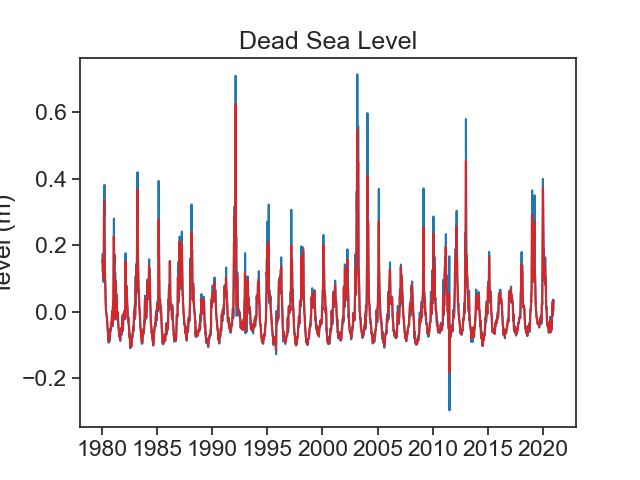

In [10]:
fig, ax = plt.subplots()
ax.plot(df3.loc["1980":"2020", 'naive'], color="tab:blue")
ax.plot(df3.loc["1980":"2020", 'gradient'], color="tab:red")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")

In [11]:
df3 = df2["level"].rolling('365.24D', center=True).mean().to_frame()

[Text(0.5, 1.0, 'Dead Sea Level'), Text(0, 0.5, 'level (m)')]

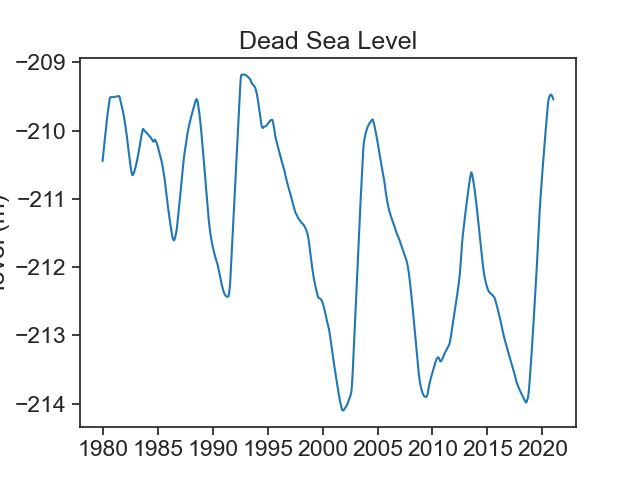

In [12]:
fig, ax = plt.subplots()
ax.plot(df3.loc["1980":"2020", 'level'], color="tab:blue")
ax.set(title="Dead Sea Level",
       ylabel="level (m)")